In [81]:
################################
##Matplot lib Homework Makeup###
##By: Michael Riano#############
################################

#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [82]:
#getting my files to data frames
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

In [83]:
#pulling my DF head and seeing what my column types will look like. 
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [84]:
#pulling my 2nd dataframe and seeing these column names, noted that city is a commonality
#between both dataframes.
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [85]:
#merging both data frames on city using the default join of inner#
merged_df = pd.merge(city_data_df,ride_data_df,on="city")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [86]:
#Isolating each type of ride based on city type using a boolean value search.
urban_cities = merged_df[merged_df["type"]=="Urban"]
suburban_cities = merged_df[merged_df["type"]=='Suburban']
rural_cities = merged_df[merged_df["type"]=='Rural']


In [87]:
#per homework instructions,isolating per city the count of all 3 types
#urban, rural, suburban avg fair, ride count, & drive count.
urban_ride_count = urban_cities.groupby("city")["ride_id"].count()
urban_ride_avg_fare = urban_cities.groupby("city")["fare"].mean()
urban_ride_driver_count = urban_cities.groupby("city")["driver_count"].mean()
rural_ride_count=rural_cities.groupby("city")["ride_id"].count()
rural_ride_avg_fare=rural_cities.groupby("city")["fare"].mean()
rural_ride_driver_count=rural_cities.groupby("city")["driver_count"].mean()
suburban_ride_count=suburban_cities.groupby("city")["ride_id"].count()
suburban_ride_avg_fare=suburban_cities.groupby("city")["fare"].mean()
suburban_ride_driver_count=suburban_cities.groupby("city")["driver_count"].mean()

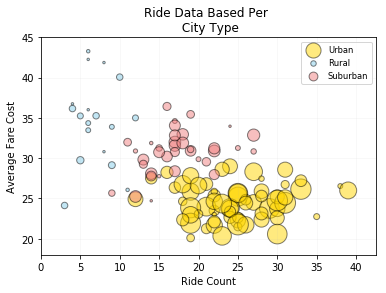

In [93]:
#creating my scatter plot using colors designated in instructions.
plt.scatter(urban_ride_count,urban_ride_avg_fare,marker = "o", s=6*urban_ride_driver_count, alpha=.5,edgecolor = "black", color = "gold", label = "Urban")
plt.scatter(rural_ride_count,rural_ride_avg_fare,marker = "o", s=6*rural_ride_driver_count, alpha=.5,edgecolor = "black", color = "skyblue", label = "Rural")
plt.scatter(suburban_ride_count,suburban_ride_avg_fare,marker = "o", s=6*suburban_ride_driver_count, alpha=.5,edgecolor = "black", color = "lightcoral", label = "Suburban")
plt.title("Ride Data Based Per \n City Type")
plt.xlabel("Ride Count")
plt.ylabel("Average Fare Cost")
plt.xlim(0,42.5)
plt.ylim(18,45,10)
plt.grid(alpha=.1)
plt.legend(loc="upper right", fontsize = "small")

A few assumptions could be made based on this data set.
Firstly, Rural fares routinely costed more most likely due to the extra cost of having
low traffic via ride counts.
Secondly, suburban rides typically seem to be the middle of the chart relating to cost and actual ride count. 
Urban seems to make up the bulk of the requests thoroughout the cities, routinely costs less, and appears to take up the majority of ride counts.  
Based on this information, it appears the average client is a suburban to ubran user paying close to an average fair between 25 and 30$.  

In [94]:
#getting percentages needed for pie charts.

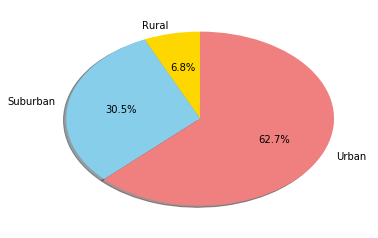

In [95]:
fare_types = 100*merged_df.groupby(["type"])["fare"].sum()/ merged_df["fare"].sum()
plt.pie(fare_types, labels = ["Rural", "Suburban", "Urban"],colors= ["gold", "skyblue", "lightcoral"], autopct='%1.1f%%', shadow = "True", startangle = 90)
plt.show()

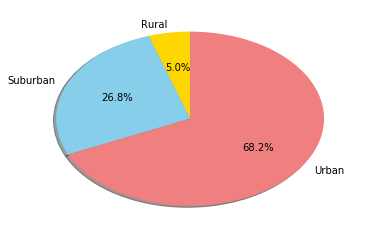

In [96]:
ride_types = 100*merged_df.groupby(["type"])["ride_id"].sum()/ merged_df["ride_id"].sum()
ride_types
plt.pie(ride_types, labels = ["Rural", "Suburban", "Urban"],colors= ["gold", "skyblue", "lightcoral"], autopct='%1.1f%%', shadow = "True",startangle = 90)
plt.show()

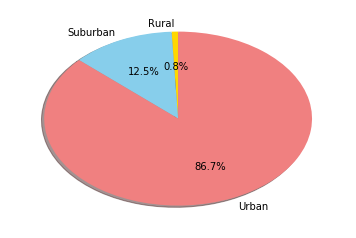

In [97]:
driver_types = 100*merged_df.groupby(["type"])["driver_count"].sum()/ merged_df["driver_count"].sum()
driver_types
plt.pie(driver_types, labels = ["Rural", "Suburban", "Urban"],colors= ["gold", "skyblue", "lightcoral"], autopct='%1.1f%%', shadow = "True", startangle = 90)
plt.show()